In [1]:
import pandas as pd
import openpyxl
import math
from matplotlib import pyplot as plt
import statistics as sts

In [2]:
# Load data
stats = pd.read_excel('NBA_log.xlsx', sheet_name = 'Basic')

In [3]:
# Preliminary work: erase duplicates, set current team, separate player name and unique id

# Separate name and ID
unique_id = []; Player = []
for player in stats['Player']:
    
    idx = player.find('\\')
    Player.append(player[:idx])
    unique_id.append(player[idx+1:])
    
stats = stats.drop(columns = 'Player')
stats.insert(1, 'Player', Player)
stats.insert(2, 'ID', unique_id)

# Erase duplicates and set correct current team
unique_id = ''; unique_id2 = ''
team = []; unique_pl = []
for ids, tm, i in zip(stats['ID'], stats['Tm'], list(stats.index)):
    
    if ids != unique_id:
        unique_pl.append(i)
    
    unique_id = ids
    
    if tm == 'TOT':
        unique_id2 = ids
        df_mult = stats[stats['ID'] == ids]
        team.append(df_mult['Tm'].iloc[-1])
        
    elif ids != unique_id2:
        team.append(tm)
        
stats = stats.iloc[unique_pl]
stats['Tm'] = team
    

In [4]:
# Team colours
tm_col = {'ATL': 'indianred', 
          'BOS': 'green',
          'BRK': 'black',
          'CHI': 'red',
          'CHO': 'aqua',
          'CLE': 'maroon',
          'DAL': 'cornflowerblue',
          'DEN': 'indigo',
          'DET': 'royalblue',
          'GSW': 'gold',
          'HOU': 'lightcoral',
          'IND': 'y',
          'LAC': 'silver',
          'LAL': 'yellow',
          'MEM': 'skyblue',
          'MIA': 'orangered',
          'MIL': 'forestgreen',
          'MIN': 'lime',
          'NOP': 'goldenrod',
          'NYK': 'darkorange',
          'OKC': 'dodgerblue',
          'ORL': 'navy',
          'PHI': 'blue',
          'PHO': 'orange',
          'POR': 'rosybrown',
          'SAC': 'mediumslateblue',
          'SAS': 'dimgrey',
          'TOR': 'salmon',
          'UTA': 'limegreen',
          'WAS': 'midnightblue'
         }

col = []
for team in stats['Tm']:
    col.append(tm_col.get(team))
    
stats['colour'] = col

In [5]:
# Qualifying players
stats_qu = stats[stats['MP'] >= 15][stats['G'] >= 50]

/var/folders/x8/gymrgfns32bd6rd_ksf19p3m0000gn/T/ipykernel_32823/1368240753.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stats_qu = stats[stats['MP'] >= 15][stats['G'] >= 50]


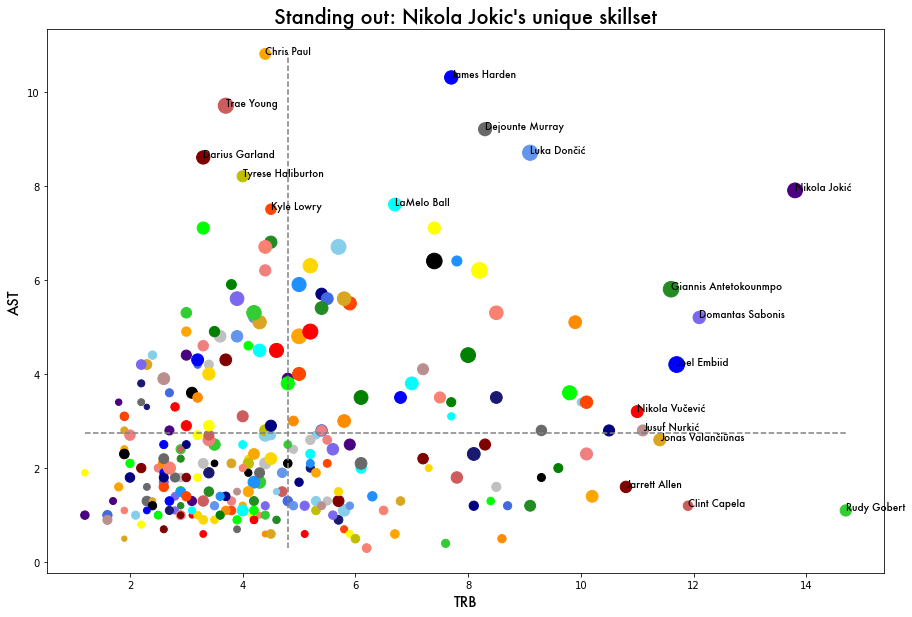

In [37]:
# Plotting: AST vs. REB

fig = plt.figure(figsize = (15,10))

def scat(df, stat1, stat2, size, quantile):
    
    x = list(df[stat1])
    y = list(df[stat2])
    plt.scatter(x, y, s = 100/sts.mean(df[size]) * df[size], c = df['colour'])
    plt.xlabel(stat1, fontname = 'futura', size = 14); plt.ylabel(stat2, fontname = 'futura', size = 14)
    
    for i, label in enumerate(df['Player']):
        if x[i] >= sts.quantiles(x, n = quantile)[-1] or y[i] >= sts.quantiles(y, n = quantile)[-1]:
            plt.annotate(label, xy = (x[i], y[i]), size = 10, fontname = 'futura')
            
    plt.plot([min(x), max(x)], [sts.mean(y), sts.mean(y)], c = 'grey', linestyle = '--')
    plt.plot([sts.mean(x), sts.mean(x)], [min(y), max(y)], c = 'grey', linestyle = '--')
    
    
scat(stats_qu, 'TRB', 'AST', 'PTS', 25)
plt.title("Standing out: Nikola Jokic's unique skillset", fontname = 'futura', size = 20)
plt.show()
    

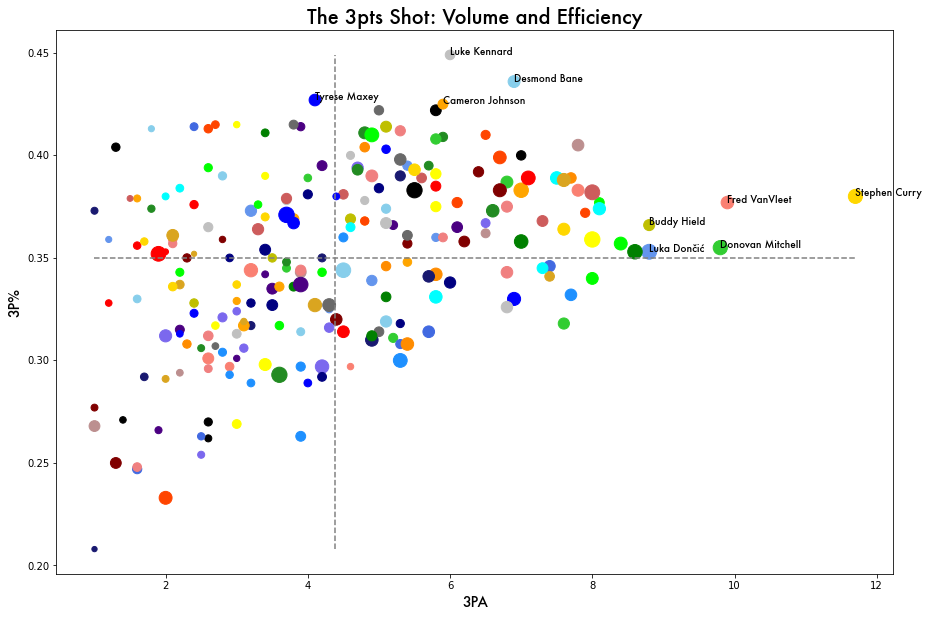

In [38]:
# 3PA vs. 3P%

stats_3 = stats_qu[stats_qu['3PA'] >= 1]
fig = plt.figure(figsize = (15,10))

scat(stats_3, '3PA', '3P%', 'PTS', 50)
plt.title("The 3pts Shot: Volume and Efficiency", fontname = 'futura', size = 20)
plt.show()

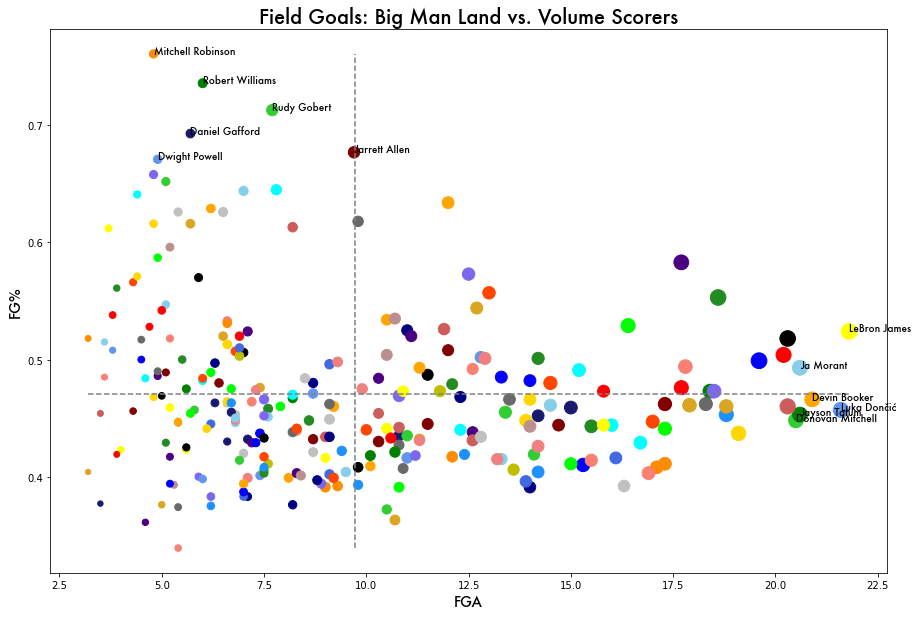

In [40]:
# FGA vs. FG%

stats_2 = stats_qu[stats_qu['FGA'] >= 3]
fig = plt.figure(figsize = (15,10))

scat(stats_2, 'FGA', 'FG%', 'PTS', 40)
plt.title("Field Goals: Big Man Land vs. Volume Scorers", fontname = 'futura', size = 20)
plt.show()

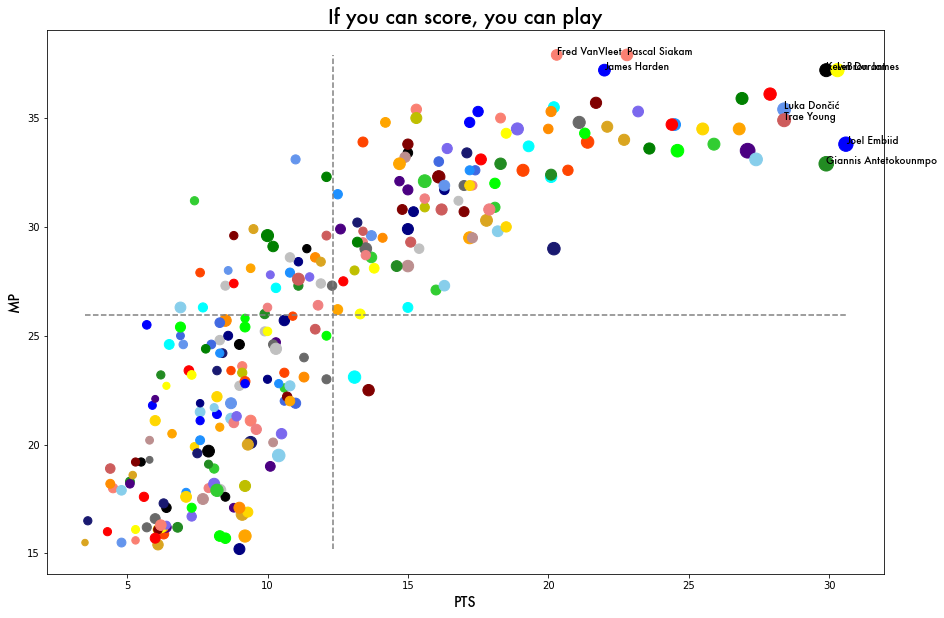

In [42]:
# PTS vs. MP

fig = plt.figure(figsize = (15,10))

scat(stats_qu, 'PTS', 'MP', 'PER', 50)
plt.title("If you can score, you can play", fontname = 'futura', size = 20)
plt.show()

In [12]:
# Load data (Advanced)
stats_adv = pd.read_excel('NBA_log.xlsx', sheet_name = 'Advanced')

In [13]:
# Preliminary work: erase duplicates, set current team, separate player name and unique id

# Separate name and ID
unique_id = []; Player = []
for player in stats_adv['Player']:
    
    idx = player.find('\\')
    Player.append(player[:idx])
    unique_id.append(player[idx+1:])
    
stats_adv = stats_adv.drop(columns = ['Player'])
stats_adv.insert(1, 'Player', Player)
stats_adv.insert(2, 'ID', unique_id)

# Erase duplicates and set correct current team
unique_id = ''; unique_id2 = ''
team = []; unique_pl = []
for ids, tm, i in zip(stats_adv['ID'], stats_adv['Tm'], list(stats_adv.index)):
    
    if ids != unique_id:
        unique_pl.append(i)
    
    unique_id = ids
    
    if tm == 'TOT':
        unique_id2 = ids
        df_mult = stats_adv[stats_adv['ID'] == ids]
        team.append(df_mult['Tm'].iloc[-1])
        
    elif ids != unique_id2:
        team.append(tm)
        
stats_adv = stats_adv.iloc[unique_pl]
stats_adv['Tm'] = team

stats_adv['colour'] = col

In [45]:
# Qualifying minutes
min_mins = 1000
stats_adv_qu = stats_adv[stats_adv['MP'] >= min_mins]

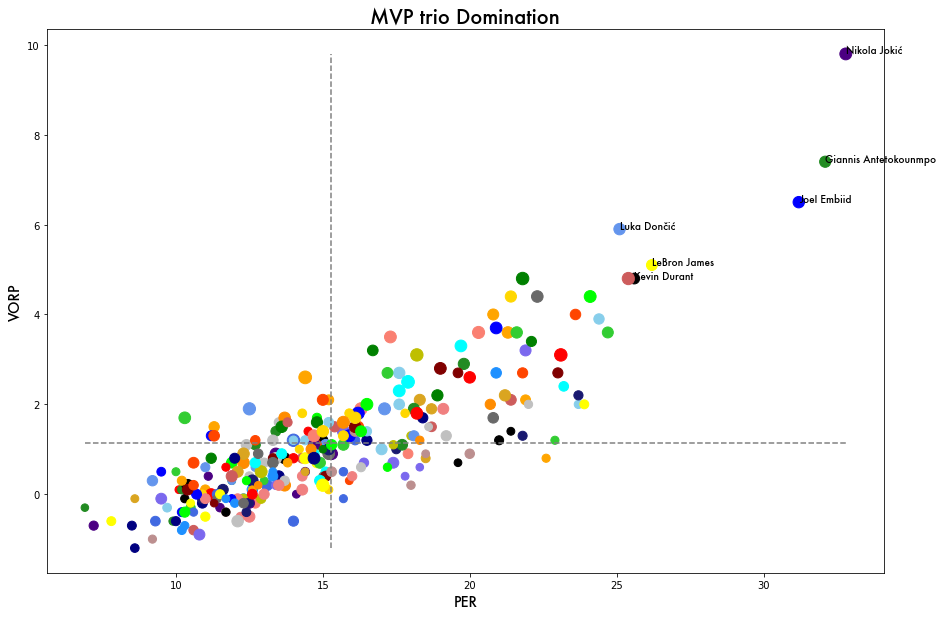

In [50]:
# PER vs. VORP

fig = plt.figure(figsize = (15,10))

scat(stats_adv_qu, 'PER', 'VORP', 'MP', 50)
plt.title("MVP trio Domination", fontname = 'futura', size = 20)
plt.show()

In [19]:
def line_scat(df, stat, pos):
    
    n = len(stats_adv_qu)
    plt.scatter(n*[pos], df[stat], c = df['colour'], s = df['PER'])
    
    for i, label in enumerate(df['Player']):
        if df[stat].iloc[i] >= list(df[stat].sort_values())[-3]:
            plt.annotate(label, xy = (pos, df[stat].iloc[i]), size=10, fontname = 'futura')
            
    stats_adv_qu.nlargest(10, 'PER')


metrics = ['BPM', 'OBPM', 'VORP', 'WS', 'OWS']

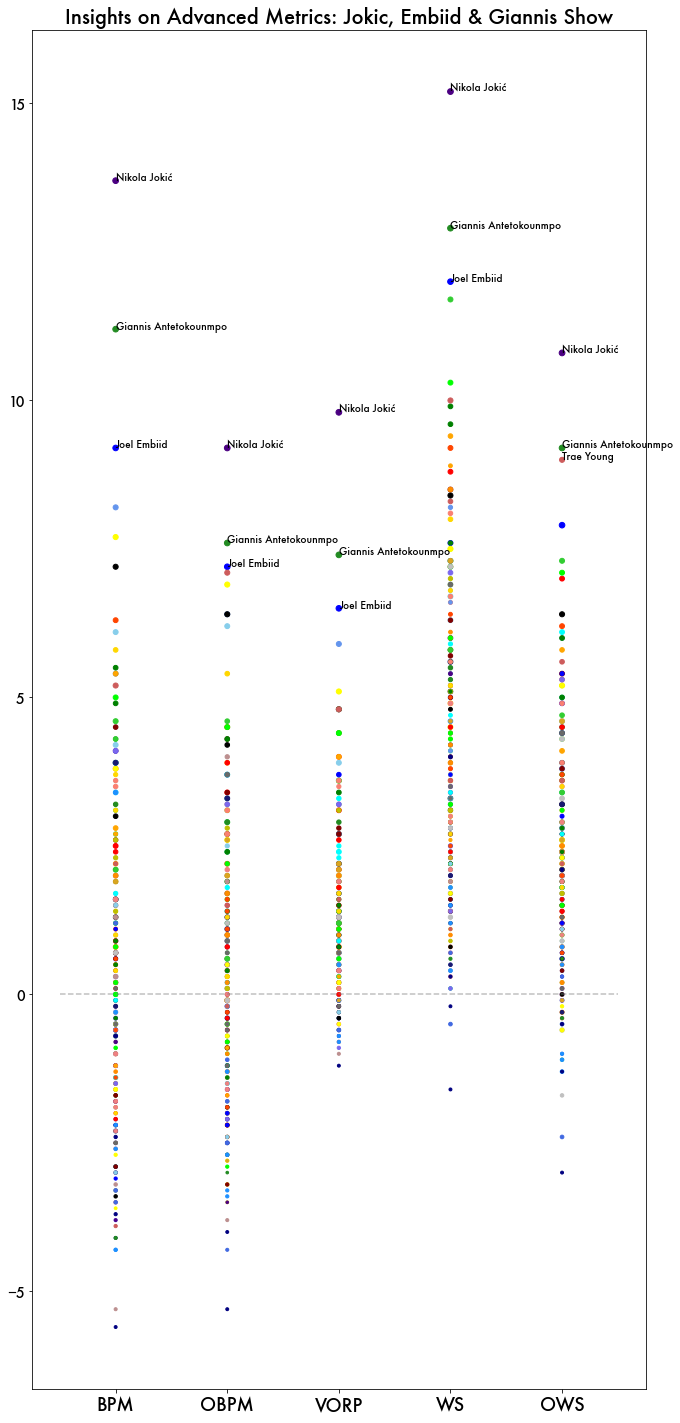

In [52]:
fig = plt.figure(figsize = (11,25))

for i, metric in enumerate(metrics):
    
    line_scat(stats_adv_qu, metric, i)

plt.plot([-0.5, 4.5], [0, 0], linestyle = '--', c = 'gray', alpha = 0.5)
plt.xticks(list(range(0,5)), metrics, fontname = 'futura', size = 18)
plt.yticks(fontname = 'futura', size = 14)

plt.title("Insights on Advanced Metrics: Jokic, Embiid & Giannis Show", fontname = 'futura', size = 20)
plt.show()
